In [1]:
import pandas as pd

In [2]:
METADATA = 'sautidb_hausa_metadata.csv'
df = pd.read_csv(METADATA)

### Prepare filename for download

In [3]:
df_filter = df[df["nationality"] == "Nigerian"]
df_filter = df_filter[df_filter["nativeLanguage"] == "Hausa"]
df_filter = df_filter[df_filter["status"] == "Good"]
df_filter = df_filter[["userID", "sentence", "nativeLanguage", "fluentLanguage", "file_url", "gender"]]
print(len(df_filter))
df_filter.head()

221


,userID,sentence,nativeLanguage,fluentLanguage,file_url,gender
0,U2FsdGVkX199GtRKC0wMQsiY7dDBqn3VGWqZanl3ViY7gH...,arctic_b0473,Hausa,Portuguese,1633373369566_REC1633373367317.wav,m
1,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0588,Hausa,Hausa,1633466586721_REC1633466576008.wav,m
2,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0054,Hausa,Hausa,1633466618953_REC1633466611136.wav,m
3,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_b0092,Hausa,Hausa,1633466636397_REC1633466629517.wav,m
4,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0195,Hausa,Hausa,1633466688275_REC1633466682197.wav,m


In [4]:
df_filter["file_url"].to_csv("sautidb_hausa_filename.csv", index=None, header=None)

### Generate UserID

In [5]:
## we should adopt a standard for generating short userID. 
## idea 1: create a userID mapping using the raw metadata. 
## sort this by the date of creation to ensure that the mapping can only grow in length and userID=0001 will always be the same
## idea 2: use hash function to generate shorter userID. 

i=1241 # max userID in version1.0
user_ids = df_filter['userID'].to_list()
user_id_map = {}
for user in user_ids:
    new_id = str(i + 1).zfill(4)
    if user not in user_id_map:
        user_id_map[user] = new_id
        i += 1

In [6]:
df_filter.loc[:, 'speaker_id'] = df_filter['userID'].apply(lambda x: str( user_id_map[x]))
df_filter.head()

,userID,sentence,nativeLanguage,fluentLanguage,file_url,gender,speaker_id
0,U2FsdGVkX199GtRKC0wMQsiY7dDBqn3VGWqZanl3ViY7gH...,arctic_b0473,Hausa,Portuguese,1633373369566_REC1633373367317.wav,m,1242
1,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0588,Hausa,Hausa,1633466586721_REC1633466576008.wav,m,1243
2,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0054,Hausa,Hausa,1633466618953_REC1633466611136.wav,m,1243
3,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_b0092,Hausa,Hausa,1633466636397_REC1633466629517.wav,m,1243
4,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0195,Hausa,Hausa,1633466688275_REC1633466682197.wav,m,1243


In [7]:
df_filter["speaker_id"].min(), df_filter["speaker_id"].max()

('1242', '1260')

## Remove duplicates

In [8]:
duplicates = df_filter[df_filter.duplicated(subset=['speaker_id','sentence'], keep='first')]
print(len(duplicates))
duplicates.head()

3


,userID,sentence,nativeLanguage,fluentLanguage,file_url,gender,speaker_id
36,U2FsdGVkX1/kzzIeHwiMGpvINdDs2CWlTOFN+kRNWsKn6D...,arctic_a0058,Hausa,Hausa,1633478265474_REC1633478249177.wav,m,1247
64,U2FsdGVkX1/j0D4VVLDj0ioPS5NCP1QLEA9YPrCiX69T/Y...,arctic_a0402,Hausa,Hausa,1633487005094_REC1633486998749.wav,m,1249
235,U2FsdGVkX18ARMNcf5gKXyLaDqKD9IIrPFCyWV6Ct7orgW...,arctic_b0488,Hausa,Hausa,1633527559860_REC1633527542862.wav,m,1256


In [9]:
df_filter = df_filter.drop(duplicates.index)
len(df_filter)

218

### Prepare filename for release

In [10]:
df_filter['fluentLanguage'] = df_filter['fluentLanguage'].apply(lambda x: "".join(x).upper())
df_filter['nativeLanguage'] = df_filter['nativeLanguage'].apply(lambda x: "".join(x).upper())
df_filter['gender'] = df_filter['gender'].apply(lambda x: x.upper())
df_filter['sentence_id_short'] = df_filter.sentence.apply(lambda x: x.split('_')[-1].capitalize())
df_filter.head()

,userID,sentence,nativeLanguage,fluentLanguage,file_url,gender,speaker_id,sentence_id_short
0,U2FsdGVkX199GtRKC0wMQsiY7dDBqn3VGWqZanl3ViY7gH...,arctic_b0473,HAUSA,PORTUGUESE,1633373369566_REC1633373367317.wav,M,1242,B0473
1,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0588,HAUSA,HAUSA,1633466586721_REC1633466576008.wav,M,1243,A0588
2,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0054,HAUSA,HAUSA,1633466618953_REC1633466611136.wav,M,1243,A0054
3,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_b0092,HAUSA,HAUSA,1633466636397_REC1633466629517.wav,M,1243,B0092
4,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0195,HAUSA,HAUSA,1633466688275_REC1633466682197.wav,M,1243,A0195


**Filename structure: nativeLanguage_fluentLanguage_speakerID_gender_sentenceID.wav**

In [11]:
cols = ['nativeLanguage', 'fluentLanguage', 'speaker_id', 'gender', 'sentence_id_short']
df_filter['new_filename'] = df_filter[cols].apply(lambda row: f"{'_'.join(row.values.astype(str))}.wav", axis=1)
df_filter.head()

,userID,sentence,nativeLanguage,fluentLanguage,file_url,gender,speaker_id,sentence_id_short,new_filename
0,U2FsdGVkX199GtRKC0wMQsiY7dDBqn3VGWqZanl3ViY7gH...,arctic_b0473,HAUSA,PORTUGUESE,1633373369566_REC1633373367317.wav,M,1242,B0473,HAUSA_PORTUGUESE_1242_M_B0473.wav
1,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0588,HAUSA,HAUSA,1633466586721_REC1633466576008.wav,M,1243,A0588,HAUSA_HAUSA_1243_M_A0588.wav
2,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0054,HAUSA,HAUSA,1633466618953_REC1633466611136.wav,M,1243,A0054,HAUSA_HAUSA_1243_M_A0054.wav
3,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_b0092,HAUSA,HAUSA,1633466636397_REC1633466629517.wav,M,1243,B0092,HAUSA_HAUSA_1243_M_B0092.wav
4,U2FsdGVkX18pehkcch3q3J4u/4k+jPHvhO8UgSKH5u7sic...,arctic_a0195,HAUSA,HAUSA,1633466688275_REC1633466682197.wav,M,1243,A0195,HAUSA_HAUSA_1243_M_A0195.wav


In [12]:
final_df = df_filter.drop(columns=['userID', "sentence_id_short"]).reset_index(drop=True)
final_df.head()

,sentence,nativeLanguage,fluentLanguage,file_url,gender,speaker_id,new_filename
0,arctic_b0473,HAUSA,PORTUGUESE,1633373369566_REC1633373367317.wav,M,1242,HAUSA_PORTUGUESE_1242_M_B0473.wav
1,arctic_a0588,HAUSA,HAUSA,1633466586721_REC1633466576008.wav,M,1243,HAUSA_HAUSA_1243_M_A0588.wav
2,arctic_a0054,HAUSA,HAUSA,1633466618953_REC1633466611136.wav,M,1243,HAUSA_HAUSA_1243_M_A0054.wav
3,arctic_b0092,HAUSA,HAUSA,1633466636397_REC1633466629517.wav,M,1243,HAUSA_HAUSA_1243_M_B0092.wav
4,arctic_a0195,HAUSA,HAUSA,1633466688275_REC1633466682197.wav,M,1243,HAUSA_HAUSA_1243_M_A0195.wav


In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sentence ID distribution')

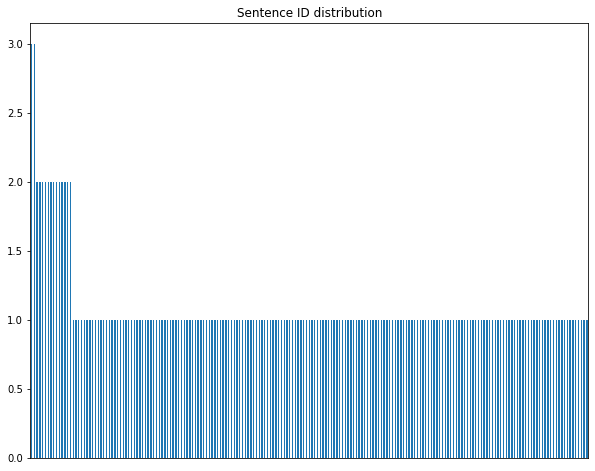

In [14]:
final_df.sentence.value_counts().plot(kind='bar', figsize=(10, 8), xticks=[])
plt.title("Sentence ID distribution")

Text(0.5, 1.0, 'Unique speaker ids')

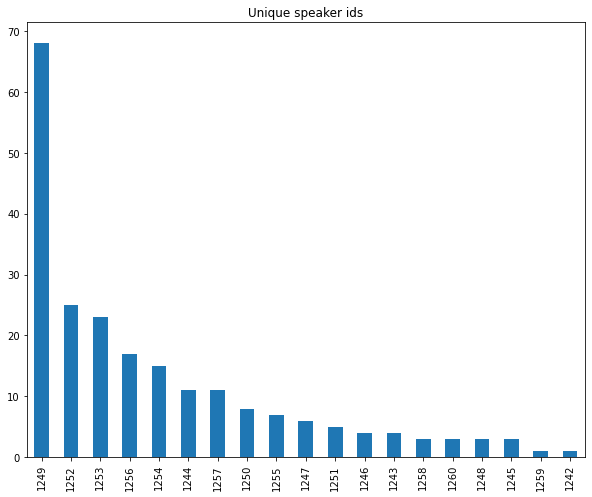

In [15]:
final_df.speaker_id.value_counts().plot(kind='bar', figsize=(10, 8))
plt.title("Unique speaker ids")

Text(0.5, 1.0, 'Gender distribution')

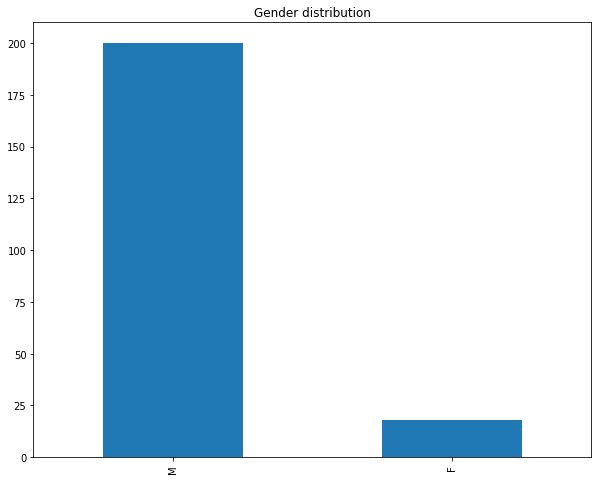

In [16]:
final_df.gender.value_counts().plot(kind='bar', figsize=(10, 8))
plt.title("Gender distribution")

Text(0.5, 1.0, 'Fluent Language distribution')

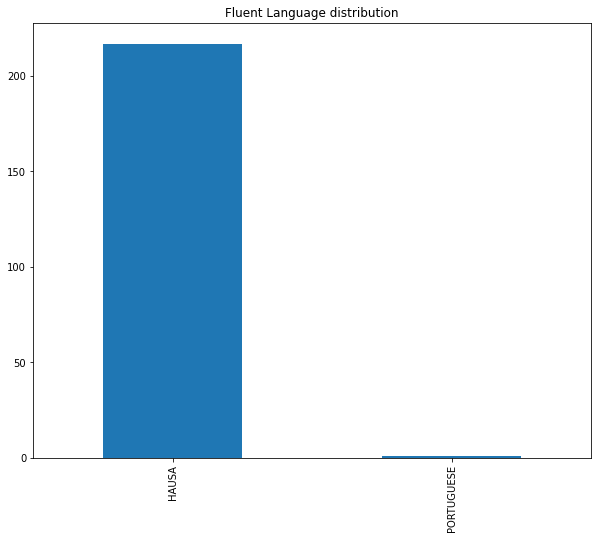

In [17]:
final_df.fluentLanguage.value_counts().plot(kind='bar', figsize=(10, 8))
plt.title("Fluent Language distribution")

In [18]:
# Used to rename the files
today="26032022"
final_df.loc[:, ['file_url', 'new_filename']].to_csv(f'sautidb_hausa_{today}_filename_newname.csv', index=None, header=False)
